In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [2]:
df = pd.read_csv('mobile_sales_data.csv')
df

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Laptop,Motorola,8C187637,Pick build kind teach mean each camera.,170385,2024-03-02,2024-04-11,6,Sara Gomez,Sylviatown,North,i3,i3,16GB,512GB,2TB
49996,Laptop,HP,0DA9E4D3,Outside policy treat he opportunity pattern.,193133,2025-01-19,2025-01-20,4,Raymond Clark,Chrismouth,West,i7,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,CAD89A93,Test floor tax together out adult discover own...,66502,2024-01-16,2024-03-05,6,Joseph Martin,Huntfurt,North,i5,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,78566C17,Away also magazine receive such lay.,158883,2023-05-15,2023-05-25,2,Gabrielle Barnett,Heidiberg,North,NaN,Snapdragon 7s,12GB,1TB,NaN


In [3]:
df.head()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
0,Mobile Phone,Motorola,88EB4558,Site candidate activity company there bit insi...,78570,2023-08-02,2023-08-03,6,William Hess,South Kelsey,Central,NaN,Snapdragon 7 Gen,12GB,128GB,NaN
1,Laptop,Oppo,416DFEEB,Beat put care fight affect address his.,44613,2023-10-03,2023-10-06,1,Larry Smith,North Lisa,South,Ryzen 5,Ryzen 5,8GB,512GB,256GB
2,Mobile Phone,Samsung,9F975B08,Energy special low seven place audience.,159826,2025-03-19,2025-03-20,5,Leah Copeland,South Todd,Central,NaN,MediaTek Dimensity,8GB,256GB,NaN
3,Laptop,Sony,73D2A7CC,Friend record hard contain minute we role sea ...,20911,2024-02-06,2024-03-27,1,Dan Kirby,New Jordanmouth,South,i7,i7,12GB,64GB,2TB
4,Laptop,Microsoft,CCE0B80D,Program recently feeling save tree hotel people.,69832,2023-08-10,2023-09-10,4,Dean Martin,Keithton,East,i7,i7,8GB,128GB,2TB


In [4]:
df.tail()

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Quantity Sold,Customer Name,Customer Location,Region,Core Specification,Processor Specification,RAM,ROM,SSD
49995,Laptop,Motorola,8C187637,Pick build kind teach mean each camera.,170385,2024-03-02,2024-04-11,6,Sara Gomez,Sylviatown,North,i3,i3,16GB,512GB,2TB
49996,Laptop,HP,0DA9E4D3,Outside policy treat he opportunity pattern.,193133,2025-01-19,2025-01-20,4,Raymond Clark,Chrismouth,West,i7,i7,8GB,1TB,512GB
49997,Laptop,Toshiba,CAD89A93,Test floor tax together out adult discover own...,66502,2024-01-16,2024-03-05,6,Joseph Martin,Huntfurt,North,i5,i5,4GB,64GB,2TB
49998,Mobile Phone,Lenovo,78566C17,Away also magazine receive such lay.,158883,2023-05-15,2023-05-25,2,Gabrielle Barnett,Heidiberg,North,NaN,Snapdragon 7s,12GB,1TB,NaN
49999,Laptop,Asus,9C3FC57C,Role ahead common listen idea few blood half.,86483,2023-08-29,2023-10-26,7,Robert Sampson,West Elizabethchester,East,i7,i7,12GB,128GB,256GB


In [5]:
df.corr(numeric_only=True)

,Price,Quantity Sold
Price,1.00000,-0.00222
Quantity Sold,-0.00222,1.00000


<Axes: >

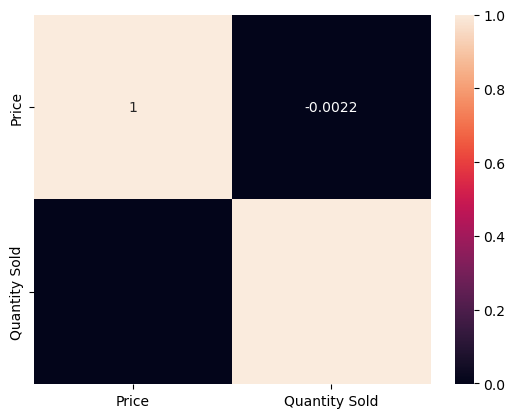

In [6]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/aman-chaurasia/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


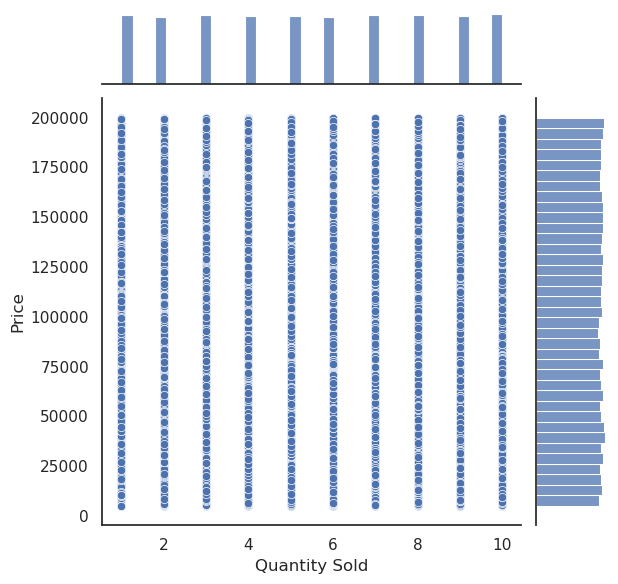

In [7]:
df_Time_web_Amount=df.filter({"Quantity Sold","Price"})
sns.set(style="white", color_codes=True)
sns.color_palette()
sns.jointplot(x="Quantity Sold",y="Price", data=df_Time_web_Amount)

<Axes: >

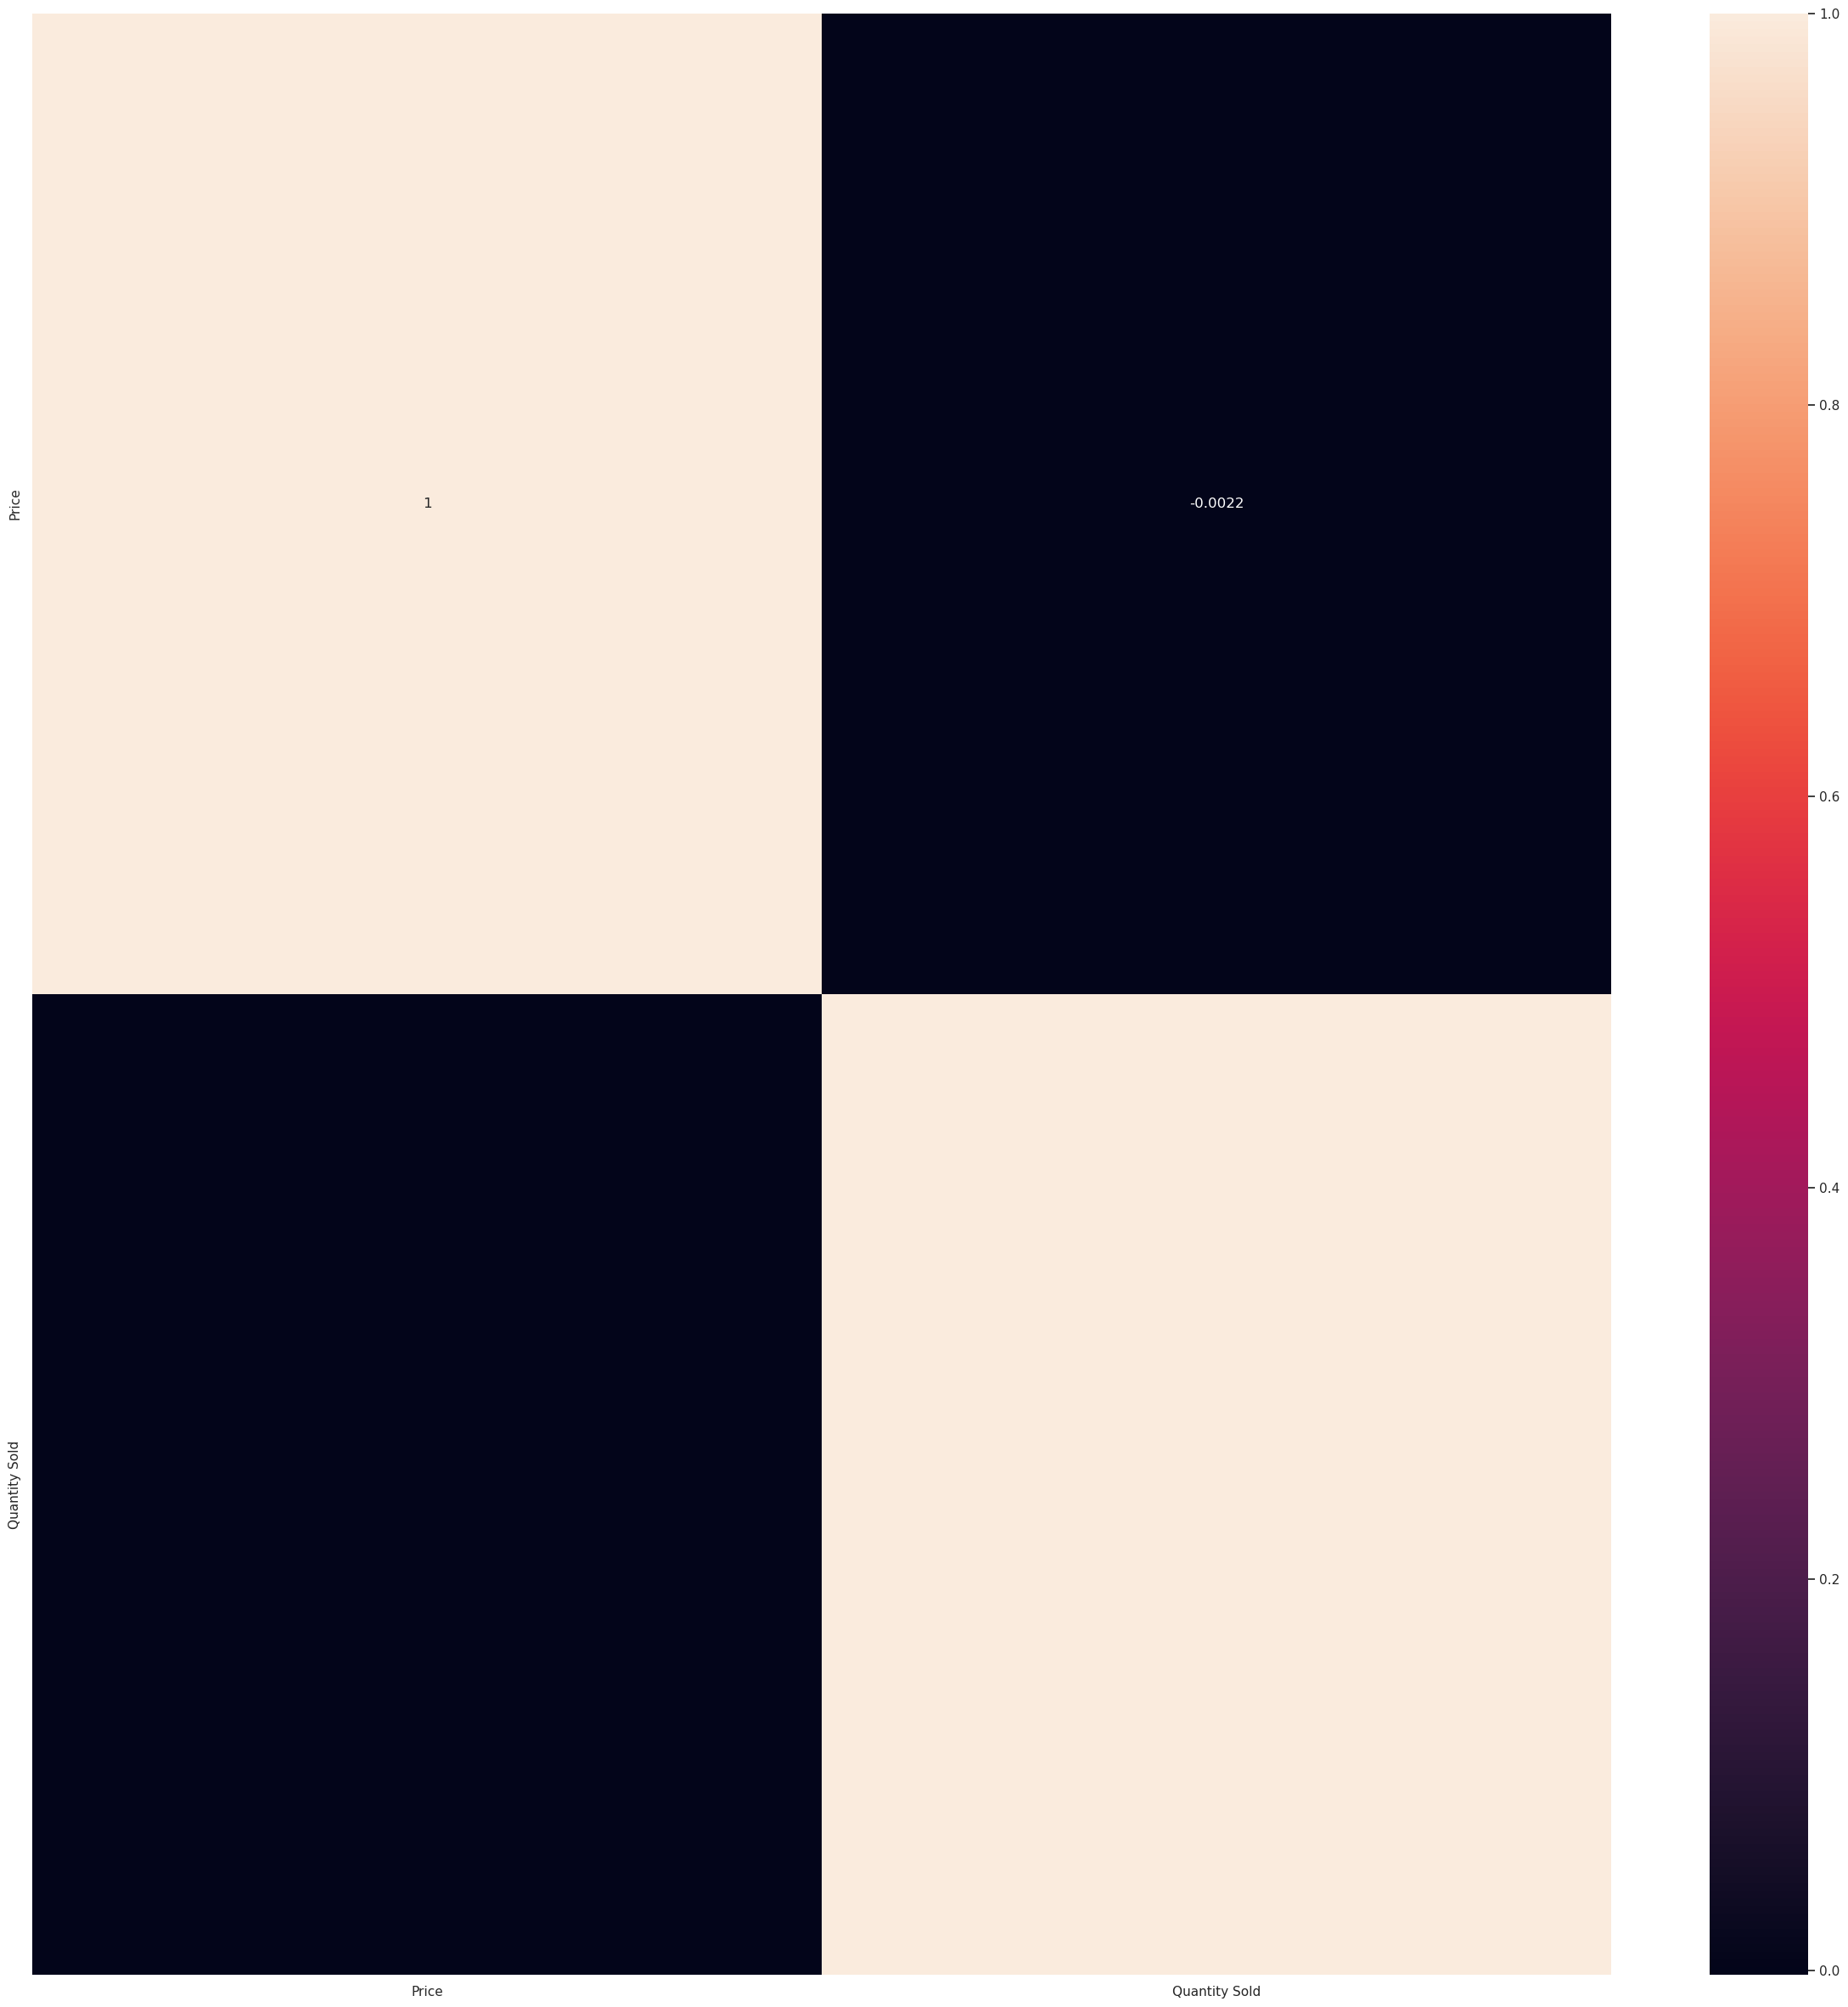

In [8]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(numeric_only="TRUE"),annot= True)

In [9]:
target='Quantity Sold'

In [10]:
X=df.drop(columns=["Quantity Sold"]).dropna(axis=1)
y=df[target]

In [11]:
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = LabelEncoder().fit_transform(X[col])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Customer Name,Customer Location,Region,Processor Specification,RAM,ROM
39087,1,2,7052,32688,155581,567,578,32213,1883,0,9,1,3
30893,1,18,33273,27112,170624,367,412,32337,10873,4,1,4,1
45278,0,5,47547,14703,179555,465,517,22262,6620,1,6,5,4
16398,1,0,4270,48497,87067,377,401,17043,3125,4,9,1,4
13653,1,18,44157,40314,180518,374,407,8473,17933,1,10,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0,6,44504,23824,172951,401,450,13514,7531,2,14,1,3
44732,0,15,34022,4664,74978,16,71,19330,839,3,4,5,1
38158,1,15,12293,48393,165765,19,58,4669,25058,2,1,4,0
860,0,4,48290,4989,11786,162,177,24372,12895,3,4,2,4


In [14]:
y_train

39087    10
30893    10
45278     6
16398     2
13653     5
         ..
11284     1
44732     2
38158     6
860      10
15795    10
Name: Quantity Sold, Length: 40000, dtype: int64

In [15]:
X_test

,Product,Brand,Product Code,Product Specification,Price,Inward Date,Dispatch Date,Customer Name,Customer Location,Region,Processor Specification,RAM,ROM
33553,0,15,19455,37774,9218,403,427,36461,23572,1,4,0,0
9427,0,10,43739,14977,68373,111,167,8243,6656,3,5,5,0
199,1,3,42071,42789,9552,699,733,29302,1487,3,1,2,3
12447,0,4,28399,5382,114672,510,532,36675,17929,2,4,0,0
39489,1,18,4440,27321,159039,279,326,34878,7397,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28567,0,15,14117,27594,171608,630,638,14360,24138,0,11,2,0
25079,1,10,22603,38928,6095,520,545,8393,9657,3,1,1,3
18707,0,4,7839,766,22397,167,217,7601,21250,2,6,3,4
15200,1,3,29518,34829,62098,463,464,8893,13331,0,2,2,0


In [16]:
y_test

33553    3
9427     7
199      7
12447    3
39489    5
        ..
28567    4
25079    9
18707    6
15200    3
5857     1
Name: Quantity Sold, Length: 10000, dtype: int64

In [17]:
l_model=LinearRegression()
l_model.fit(X_train,y_train)

LinearRegression()

In [38]:
d_model = DecisionTreeRegressor()
d_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [41]:
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [42]:
y_pred = model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print(mse)
#root mean squrae error
rmse=np.sqrt(mse)
print("the root mean square error are:",rmse)

8.399584670000001
the root mean square error are: 2.898203697119994
